In [26]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
X_train[0].shape

(32, 32, 3)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [15]:
classes[4]

'deer'

In [9]:
y_train[:5]  # its a 2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
# reshape it to 1D array
"""
The -1 parameter in reshape(-1, ) is a placeholder for an unknown dimension. When you use -1 in one of the
dimensions, numpy will automatically calculate the size of that dimension based on the size of the original
array and the size of the other dimensions. This is often used when you want to reshape an array but don't
want to specify the size of one of the dimensions explicitly.

So, in this case, y_train.reshape(-1, ) means that numpy should reshape y_train into a 1-dimensional array,
and it will automatically calculate the size of that dimension based on the original shape of y_train.
"""
y_train = y_train.reshape(-1, )
y_train[:5], y_train[0]

(array([6, 9, 9, 4, 1], dtype=uint8), 6)

In [17]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

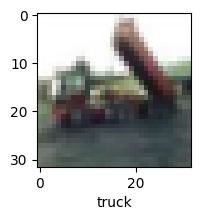

In [18]:
plot_sample(X_train, y_train, 2)

In [24]:
X_train.min(), X_train.max()

(0, 255)

In [25]:
# normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, 0.0, 1.0)

In [28]:
tf.random.set_seed(42)

# tf.keras.layers.Conv2D: This is a convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation. The input_shape parameter specifies
# the shape of the input data, which is expected to be 32x32 pixels with 3 color channels (RGB).

# tf.keras.layers.MaxPool2D: This is a max-pooling layer with a pool size of (2,2). It is used to downsample the spatial dimensions of the feature maps.
# Another set of convolutional and max-pooling layers with 64 filters is defined similarly.

# tf.keras.layers.Flatten(): This layer flattens the 2D feature maps into a 1D vector to prepare for the fully connected layers.
cnn_model = tf.keras.Sequential([
        # cnn - 2 cnn layers
        tf.keras.layers.Conv2D(filters=32,
                               kernel_size=(3,3),
                               activation = "relu",
                               input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPool2D(2, 2),

        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3,3),
                               activation = "relu"),
        tf.keras.layers.MaxPool2D(2, 2),

        # dense
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
])

cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

history_of_cnn_model = cnn_model.fit(X_train,
                                     y_train,
                                     epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4645 - accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1149 - accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9834 - accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9033 - accuracy: 0.6871
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8362 - accuracy: 0.7111
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7749 - accuracy: 0.7345
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7295 - accuracy: 0.7480
Epoch 8/10
1563/1563 [==============================] - 55s 36ms/step - loss: 0.6798 - accuracy: 0.7641
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6402 - accuracy: 0.7768
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [29]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.9313 - accuracy: 0.7000


[0.9312798976898193, 0.699999988079071]

In [30]:
y_test[:5]  # 2D

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1, )

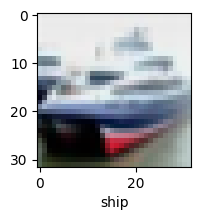

In [33]:
plot_sample(X_test, y_test, 1)

In [35]:
#  predict above sample
y_pred = cnn_model.predict(X_test)
y_pred[:5], y_pred[0]

313/313 [==============================] - 3s 11ms/step


(array([[2.92663346e-03, 6.67193453e-05, 2.33902247e-03, 7.97047019e-01,
         1.26941624e-04, 1.39434680e-01, 4.88598421e-02, 3.03851466e-05,
         9.13364068e-03, 3.50504888e-05],
        [9.43064969e-03, 1.78822055e-01, 2.60418659e-04, 4.95881807e-07,
         5.65156704e-08, 6.25925622e-09, 8.14129564e-09, 1.13693794e-07,
         8.11416805e-01, 6.93157781e-05],
        [3.12654138e-01, 3.51333618e-01, 9.17042699e-03, 3.54344025e-03,
         3.37096630e-03, 3.71651549e-04, 4.29295376e-03, 9.97743756e-03,
         2.92752385e-01, 1.25330072e-02],
        [6.84708774e-01, 4.75339871e-03, 4.39072438e-02, 1.00398285e-03,
         2.44594291e-01, 1.80178267e-05, 3.34052718e-04, 6.09646318e-03,
         1.45700416e-02, 1.36504414e-05],
        [1.57288687e-05, 1.45479282e-06, 2.37245532e-03, 6.57126680e-03,
         9.19556141e-01, 1.62260840e-03, 6.98323920e-02, 2.30788773e-05,
         4.10518714e-06, 8.00514954e-07]], dtype=float32),
 array([2.9266335e-03, 6.6719345e-05, 2.339

In [46]:
# array([2.9266335e-03, 6.6719345e-05, 2.3390225e-03, 7.9704702e-01,
        # 1.2694162e-04, 1.3943468e-01, 4.8859842e-02, 3.0385147e-05,
        # 9.1336407e-03, 3.5050489e-05], dtype=float32)),
        # max in this - > np.argmax(y_pred[index])
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 1, 0, 4]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

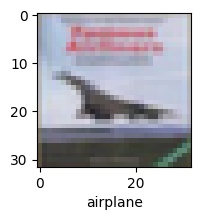

In [48]:
plot_sample(X_test, y_test, 3)

In [49]:
classes[y_pred_classes[3]]

'airplane'

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print("classification report \n", classification_report(y_test, y_pred_classes))

classification report 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1000
           1       0.83      0.81      0.82      1000
           2       0.63      0.55      0.59      1000
           3       0.53      0.47      0.50      1000
           4       0.59      0.69      0.64      1000
           5       0.63      0.60      0.62      1000
           6       0.80      0.77      0.78      1000
           7       0.62      0.83      0.71      1000
           8       0.81      0.81      0.81      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

